Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.\
1.1 Read the data and do exploratory data analysis. Describe the data briefly.

1.2 Do you think scaling is necessary for clustering in this case? Justify

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

Dataset for Problem 1: bank_marketing_part1_Data.csv

**Data Dictionary for Market Segmentation:**

spending: Amount spent by the customer per month (in 1000s)\
advance_payments: Amount paid by the customer in advance by cash (in 100s)\
probability_of_full_payment: Probability of payment done in full by the customer to the bank\
current_balance: Balance amount left in the account to make purchases (in 1000s)\
credit_limit: Limit of the amount in credit card (10000s)\
min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)\
max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn import tree

In [7]:
import nbconvert

In [224]:
bank=pd.read_csv('bank_marketing_part1_Data.csv')

In [225]:
bank

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443


In [226]:
bank.shape

(210, 7)

**210 rows and 7 columns in dataset.**

In [227]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


**No null values in 'bank' dataset.\
Data type is numerical (float).**

In [228]:
bank.duplicated().sum()

0

**No duplicate value in dataset.**

In [229]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


### Above table is 5 number summery.
#### Since all columns are numeric therefore every value in 5 number summery will be published.

**<u>Count:<u>**\
Each variable has same number of entries, as 210.

**<u>Mean, Median (50%) & Standard Deviation (std):<u>**\

> Mean and Median value of "spending" has hardly any difference (14.8 & 14.3); this indicate towards formation of a bell curve, means data is uniformally distributed. 
Standard Deviation (std) is low (2.9) indicating most of the data is dispersed around it's mean value.
    
> Column "advance_payments" also seems to have a balanced data as its Mean & Median value are almost the same (14.5 & 14.3).
It's std value is even smaller than "spending", only 1.3, means data points are more focused around the center.
    
> Similerly, rest all 5 columns have hardly any difference in their Mean and Median values which is a sign of the entire dataset following a normal data distribiution.
Their std values are much smaller in comparision to thier Mean values, I dont think outliers will be any problem in this dataset.

**<u>Range:<u>**\
2 types of Range:\
**A: Range (75% - 25%); also called as Inter Quartile Range (IQR).** \
**B: Range (min - max); difference bt minimum & maximum value.**

>Range values in this dataset are quite uniformal which confirms about this data being a balanced data. Picked up one column randomly here to check the Range data:**

>Column "max_spent_in_single_shopping" basically counts, Maximum amount spent by a customer in one purchase (in 1000s). If we calculate min-max range of this variable, 4500 & 6500, the difference is only 2000 which is comparatively a small difference in this case.
Also, it's Inter Quartile Range (IQR) is (5800 - 5040) = 760 which is even a smaller number.**

**Since Ranges are narrow therefore not really expecting any presence of outliers in data.**

### Check on 'OUTLIERS' in dataset

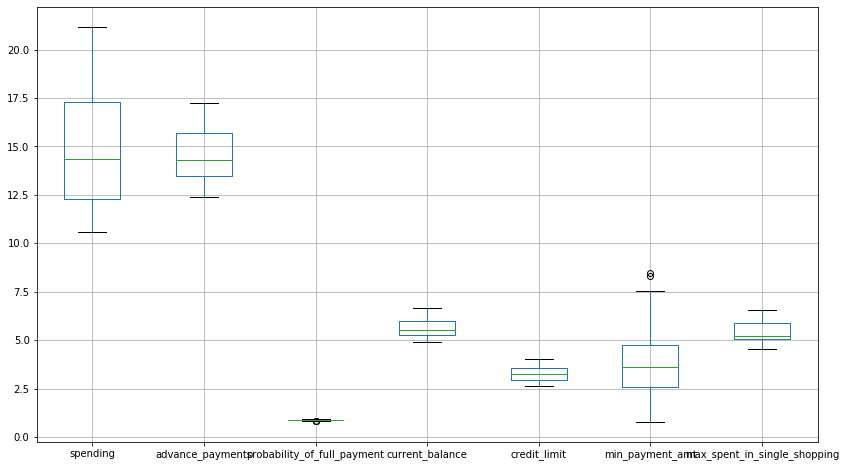

In [230]:
bank.boxplot(figsize=(14,8))

**In the quick check on outliers, they are not in a position to adversily affect performance of our model; therefore, they are not any problem in this dataset.**

### Univariate Analysis

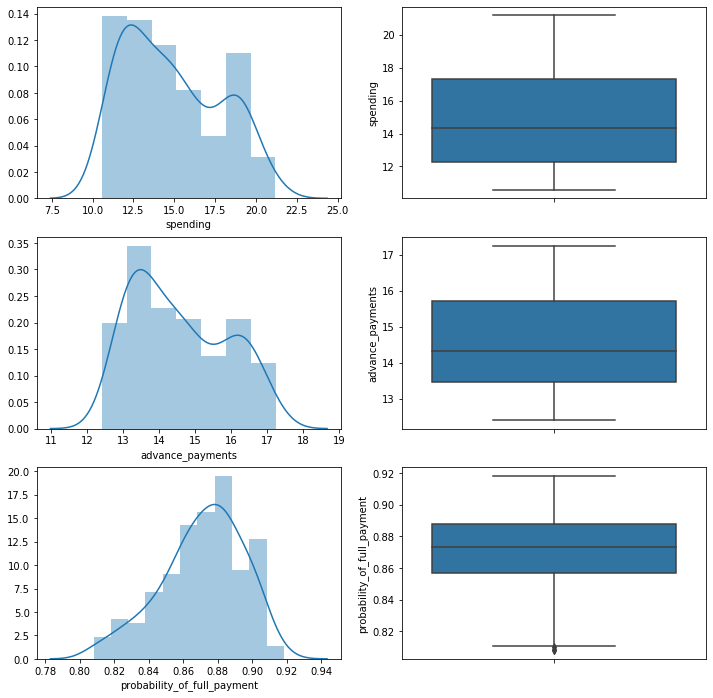

In [231]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12,12)

sns.distplot(bank['spending'], ax=axes[0][0]) 
sns.boxplot(bank['spending'], orient='v', ax=axes[0][1]) 

sns.distplot(bank['advance_payments'], ax=axes[1][0])
sns.boxplot(bank['advance_payments'], orient='v', ax=axes[1][1])

sns.distplot(bank['probability_of_full_payment'], ax=axes[2][0])
sns.boxplot(bank['probability_of_full_payment'], orient='v', ax=axes[2][1])

**<u>Distplot and Boxplot is part of univeriate analysis.<u>**

> Distplot:\
Distplot is basically a histogram with a line on it. The bell shape of that line indicates normal distribution of data in a perticular column.\
X-axis is value of variable while Y-axis is probability density function.

**"spending"** column is more or less a normal distribution curve with a marginal right skeweness.\
**"advance_payments"** distplot also looks quite alike "spending" distplot.\
**"probability_of_full_payment"** has a distplot having its curve dragging in the left, shows slight left skeweness in data.

> Boxplot:\
In Boxplot, the top line of the box is the third quartile (75%) and the bottom line of the box is the first quartile (25%). The line separating the box is basically the median value (50%). The lines outside of the box are called Whiskers, upper and lower whisker represents interquartile range (IQR).\
Data points outside upper or lower whisker is called 'Outlier'.

**"spending"** doesnt have any outlier, as no data points are present outside of its whiskers.
**"advance_payments"** boxplot also follow the suite, no outliers found.\
**"probability_of_full_payment"** has just a few outliers near its lower whisker. Also the lower whisker is bit longer than the upper one, gives an impression that this data is slightly left skewed. But there are no major concerns as no major anamoly is detected in this data. 

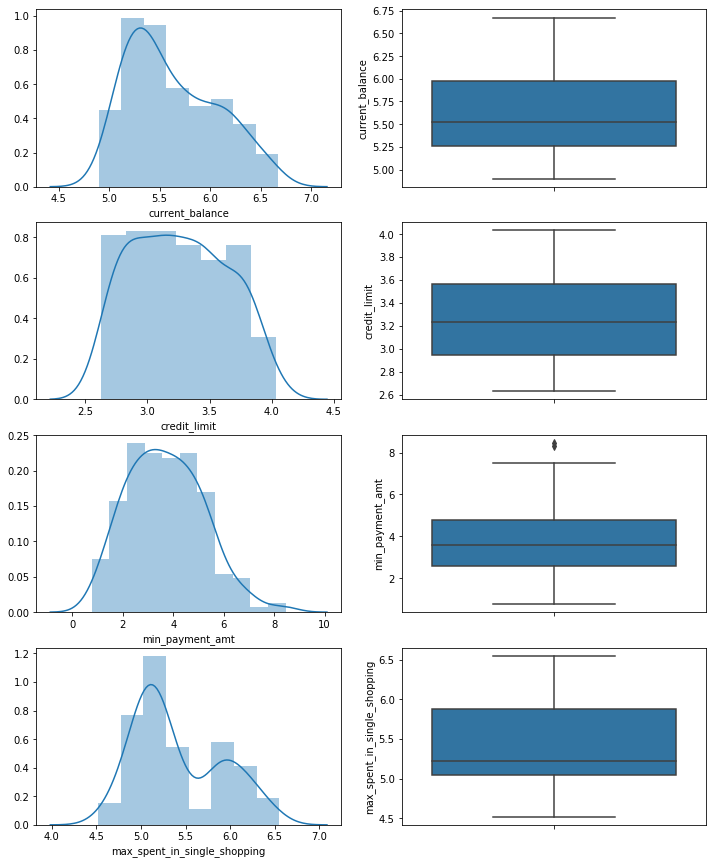

In [232]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12,15)

sns.distplot(bank['current_balance'], ax=axes[0][0]) 
sns.boxplot(bank['current_balance'], orient='v', ax=axes[0][1]) 

sns.distplot(bank['credit_limit'], ax=axes[1][0])
sns.boxplot(bank['credit_limit'], orient='v', ax=axes[1][1])

sns.distplot(bank['min_payment_amt'], ax=axes[2][0])
sns.boxplot(bank['min_payment_amt'], orient='v', ax=axes[2][1])

sns.distplot(bank['max_spent_in_single_shopping'], ax=axes[3][0])
sns.boxplot(bank['max_spent_in_single_shopping'], orient='v', ax=axes[3][1])

> **"current_balance"** has slightly right skewed bell curve.\
**"credit_limit"** formes nearly a normal bell curve. So as, **"min_payment_amt"** and **"max_spent_in_single_shopping"** columns also makes a normal bell curve formation. This signifies distribution of data near its center.

> As far as Boxplot graphics are concern, no outliers except couple of them in column **"min_payment_amt"**. No need to treat these outliers, one they are not extreme values and second they are not in large numbers. Their impact on model performance will be negligible.  

### Bivariate Analysis

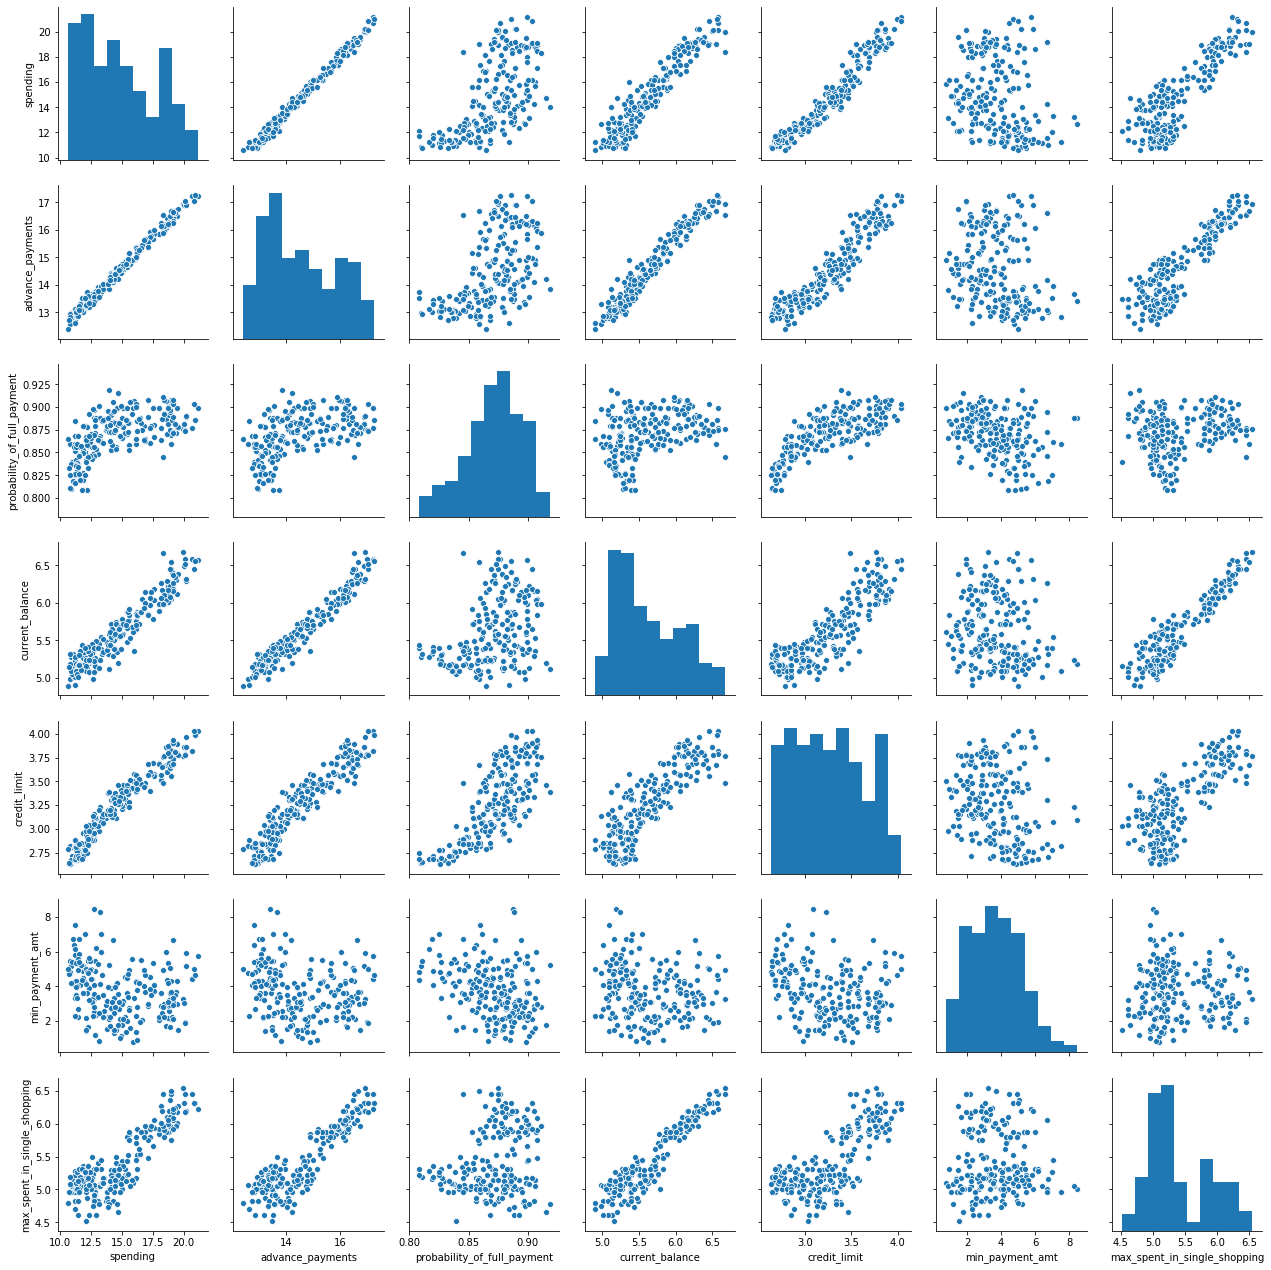

In [233]:
sns.pairplot(bank)
plt.show()

**The above pairplot highlights strong relationship between variables mentioned below:**

**A. "spending" and "advance_payments".\
B. "spending" and "current_balance".\
C. "spending" and "credit_limit".\
D. "spending" and "max_spent_in_single_shopping".\
E. "advance_payments" and "max_spent_in_single_shopping".\
F. "advance_payments" and "credit_limit".\
G. "advance_payments" and "current_balance".\
H. "current_balance" and "max_spent_in_single_shopping".\
I. "current_balance" and "credit_limit".**

The most weak relationships are found between "min_payment_amt" and it's other variables, as data points are scattered all around.


In [234]:
bank.corr().round(3)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000,0.994,0.608,0.950,0.971,-0.230,0.864
advance_payments,0.994,1.000,0.529,0.972,0.945,-0.217,0.891
probability_of_full_payment,0.608,0.529,1.000,0.368,0.762,-0.331,0.227
current_balance,0.950,0.972,0.368,1.000,0.860,-0.172,0.933
credit_limit,0.971,0.945,0.762,0.860,1.000,-0.258,0.749
min_payment_amt,-0.230,-0.217,-0.331,-0.172,-0.258,1.000,-0.011
max_spent_in_single_shopping,0.864,0.891,0.227,0.933,0.749,-0.011,1.000


**This matrics is easier to understand than the pairplot, as number are printed here.**\
**Higher the number, stronger the relationship between variables. Ignore the diagonal values '1.0'.**\
**Positive number shows positive relationships while Negative value indicates inverse relationship.**

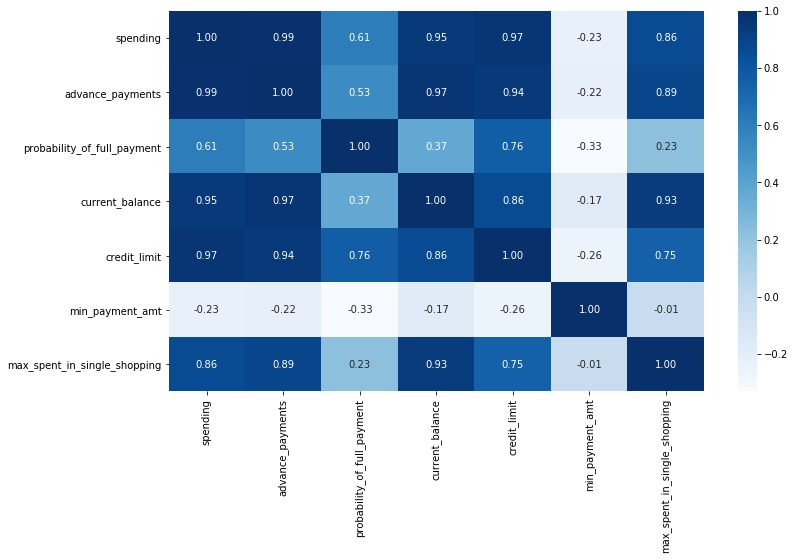

In [235]:
plt.figure(figsize=(12,7))
sns.heatmap(bank.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

**HeatMap is a graphical represention for above "Correlation Cofficient" matrics.\
The strongest correlations, above 0.9, between variables are:**

__1. "spending" and "advance_payments".__\
__2. "spending" and "current_balance".__\
__3. "spending" and "credit_limit".__\
__4. "advance_payments" and "credit_limit".__\
__5. "advance_payments" and "current_balance".__\
__6. "current_balance" and "max_spent_in_single_shopping".___

> This means, higher spending is done by those customers who have high level of current balance, or enjoys high credit limits, or they have made advance payments.
Advance payments are generally done by those who maintains high current balance in thier bank or have earned high credit limits.
The maximum spent in a single shopping heavely depends on current balance in the account.

> The most weak correlation is between "min_payment_amt" and "max_spent_in_single_shopping" which is 0.01 (negative value). This indicates the direction of the relationship which is opposite in this case.\
Min payment is for those who pay minimum amount for their purchase made in a month. This value is in (100s) which indicates, they are low value customers. Therefore, preference of maximum amount spent in one purchase (that to in 1000s) doesn't fit well with this segment of customers. 

> min_payment_amount variable has weak and negative relationship with other variables in dataset.

In [236]:
#Scales the data. Essentially returns the z-scores of every attribute
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
bank_s=sc.fit_transform(bank)

In [237]:
bank_s.shape

(210, 7)

In [238]:
bank_s=pd.DataFrame(bank_s)
bank_s.columns=['spending', 'advance_payments', 'probability_of_full_payment', 'current_balance', 'credit_limit', 'min_payment_amt', 'max_spent_in_single_shopping']
bank_s.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


**"bank_s" dataset is scalled dataset and ready to use for Clustering model.**

# Scaling data

Scaling data is a must in this dataset before doing Cluster Analysis. **The reason is clustering techniques use Euclidean Distance to form the cohorts** which makes the algoritham very sensitive to different unit of measurments or different scales of data in a dataset.

> For the present dataset, features of this dataset are measured on different units and scales, i.e.: "probability_of_full_payment" is basically a probability data while all other variables are measured on actual values (I'm assuming them as Rupees).

>Even, there is a difference in magnitude of scale for most of the variables, like: \
**"spending", "current_balance" & "max_spent_in_single_shopping" data is in 1000s,\
while "credit_limit" is in 10,000s and \
"advance_payments" and "min_payment_amt" is only in the value of 100s.**

**If we use this dataset with it's actual value (without scaling), feature like: "credit_limit" which is in 10,000s value in dataset can dominate the model in defining clusters. 
In another case like: "probability_of_full_payment"  feature, which is a prabability value and  therefore present in decimal values; they may hardly get any weightage in defining the clusters.**

As a result our clustering will be dominated only by higher value variables and other features of the dataset will be ignored which can create serious performance issue. 

**Scaling this dataset will allow all variables to be considered by the algorithm with equal importance which is good for performance of our model.**

# Apply Hierarchical Clustering

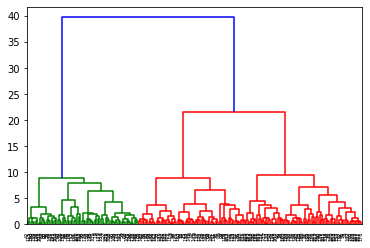

In [239]:
from scipy.cluster.hierarchy import dendrogram, linkage
wardlink = linkage(bank_s, method = 'ward')
dend = dendrogram(wardlink)

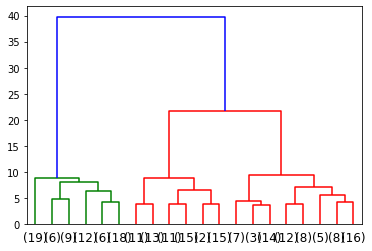

In [283]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 20,
                 )

In [284]:
from scipy.cluster.hierarchy import fcluster

In [285]:
#Method 1

clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [286]:
clusters.shape

(210,)

In [287]:
clusters.mean().round(2)

2.01

In [288]:
bank['clusters'] = clusters
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Kmeans_clusters,Agglo_CLusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,1


### Cluster Frequency

In [289]:
bank.clusters.value_counts().sort_index()

1    70
2    67
3    73
Name: clusters, dtype: int64

# Cluster Profiles

In [247]:
CP=bank.iloc[:,0:8].groupby('clusters').mean()
CP['Freq']=bank.clusters.value_counts().sort_index()
CP

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


**Cluster 1: consist of 'The Most Valuable Customers' in the pack.**
>"spending' (Rs 18,370*) and "max_spent_in_single_shopping" (> Rs 6,000) is the heighest among all 3 clusters.\ 
Their "credit_limit", "current_balance" and "advance_payments" features are also the heighest. 

**Cluster 2: This is the club of 'The Least Valuable Customers' from purchasing perspective in this dataset.**
>"spending" is the least (Rs 11,872*).\
Other scores are also the lowest on features, like: "credit_limit", "current_balance", "advance_payments" and "probability_of_full_payment".

**Cluster 3: This is a group of 'Medium Value Customers'.**
>"spending" is (Rs 14,199*) which is > cluster 2 spending but < cluster 1.\
Cluster 3 data performed better in comparision to Cluster 2 but scored less than Cluster 1 customers on features, like: "credit_limit", "current_balance", "advance_payments" and "probability_of_full_payment".

Note*: spending figures are multiplied with 1000 in description.

# AgglomerativeClustering

In [262]:
# from sklearn.cluster import AgglomerativeClustering

In [263]:
# cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
# Cluster_agglo=cluster.fit_predict(bank.iloc[:,1:6])
# print(Cluster_agglo)

[1 0 1 2 1 2 0 0 1 0 1 0 0 1 0 2 0 2 0 0 0 2 1 0 0 1 0 2 0 2 0 0 0 0 0 2 2
 2 2 1 1 0 1 1 2 0 0 1 1 1 0 1 1 1 1 1 2 2 2 1 0 2 0 1 0 1 1 0 1 0 0 0 1 1
 2 1 0 2 1 0 0 0 0 1 0 0 0 1 1 2 2 1 0 0 0 1 1 1 2 1 2 1 0 1 0 1 1 2 2 1 0
 0 1 2 2 1 0 2 2 1 0 0 2 0 0 0 1 2 0 0 0 0 0 1 2 1 1 0 1 0 1 0 0 0 0 2 1 2
 0 2 0 0 0 0 0 0 0 2 0 1 1 0 1 1 1 2 1 0 0 0 0 2 0 1 1 1 0 0 0 2 0 0 0 0 0
 1 0 0 0 0 0 0 2 1 0 1 1 2 1 2 0 0 0 2 1 0 1 0 0 0]


In [264]:
# bank["Agglo_CLusters"]=Cluster_agglo
# bank.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping', 'clusters', 'Kmeans_clusters',
       'Agglo_CLusters'],
      dtype='object')

In [265]:
# agglo_data=bank.groupby('Agglo_CLusters').mean()
# agglo_data['Freq']=bank.Agglo_CLusters.value_counts().sort_index()
# agglo_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Kmeans_clusters,Freq
Agglo_CLusters,,,,,,,,,,
0,13.643400,14.003600,0.870915,5.426690,3.129970,2.839412,5.111120,2.650000,0.390000,100
1,18.386471,16.158235,0.883600,6.164485,3.681779,3.747412,6.021471,1.058824,1.882353,68
2,11.984762,13.293571,0.850795,5.241381,2.879738,5.673262,5.121976,2.047619,0.928571,42


# Apply K-Means Clustering

In [266]:
from sklearn.cluster import KMeans

# k_means = KMeans(n_clusters = 3,random_state=1)
# k_means.fit(bank_s)
# labels = k_means.labels_
# labels


k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(bank_s)
labels = k_means.labels_
labels

array([1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2,
       1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1,
       0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0])

In [267]:
k_means.inertia_

430.6589731513006

In [268]:
wss =[]

In [269]:
for i in range(1,6):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(bank_s)
    wss.append(KM.inertia_)

In [270]:
wss

[1607.9238095238093,
 713.1763658360286,
 430.6589731513006,
 384.64678026378493,
 345.12298317221314]

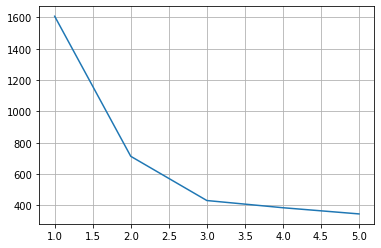

In [271]:
plt.plot(range(1,6), wss)
plt.grid()
plt.show()

**The elbow is formed on 3, therefore taking the value of k= 3.**

In [291]:
# bank_s_Kmeans = bank_s.drop('Agglo_CLusters',axis=1)

In [273]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [292]:
silhouette_score(bank_s,labels)
# Let us check the silhouette score and silhouette width for 2 clusters.

0.47806520872836267

In [293]:
silhouette_samples(bank_s,labels).min()

0.08706166716091825

In [276]:
bank_s['Kmeans_clusters'] = labels
bank_s.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Kmeans_clusters
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998,1
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,0
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107,1
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961,2
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813,1


In [277]:
bank['Kmeans_clusters'] = labels
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Kmeans_clusters,Agglo_CLusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,1


In [278]:
KMean_data=bank.groupby('Kmeans_clusters').mean().drop(['Agglo_CLusters', 'clusters'], axis=1)
KMean_data['Freq']=bank.Kmeans_clusters.value_counts().sort_index()
KMean_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Kmeans_clusters,,,,,,,,
0,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67
2,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,72


1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [279]:
KMean_data=bank.groupby('Kmeans_clusters').mean().drop(['Agglo_CLusters', 'clusters'], axis=1)
KMean_data['Freq']=bank.Kmeans_clusters.value_counts().sort_index()
KMean_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Kmeans_clusters,,,,,,,,
0,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67
2,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,72


In [280]:
KMean_data.mean()

spending                        14.930068
advance_payments                14.596319
probability_of_full_payment      0.871353
current_balance                  5.640671
credit_limit                     3.268768
min_payment_amt                  3.694034
max_spent_in_single_shopping     5.421409
Freq                            70.000000
dtype: float64

In [281]:
KMean_data.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,3.0,14.930068,3.346471,11.856944,13.147416,14.437887,16.466630,18.495373
advance_payments,3.0,14.596319,1.494697,13.247778,13.792762,14.337746,15.270590,16.203433
probability_of_full_payment,3.0,0.871353,0.020048,0.848253,0.864925,0.881597,0.882904,0.884210
current_balance,3.0,5.640671,0.484437,5.231750,5.373164,5.514577,5.845132,6.175687
credit_limit,3.0,3.268768,0.424078,2.849542,3.054384,3.259225,3.478381,3.697537
min_payment_amt,3.0,3.694034,1.018924,2.707341,3.169857,3.632373,4.187381,4.742389
max_spent_in_single_shopping,3.0,5.421409,0.537274,5.101722,5.111263,5.120803,5.581252,6.041701
Freq,3.0,70.000000,2.645751,67.000000,69.000000,71.000000,71.500000,72.000000


**Cluster 0 (32%)**.\
Lowest in "spending", advance payment, current balance, credit limit.\
lower max spent in single day than average.\
hieghest in min payment amount.


**Cluster 1 (35%)**.\
Highest in "spending", advance payment, prob of full payment, current balance, credit limit, max spent in single day.\
min payment amt is lower than average.


**Cluster 2 (33%)**.\
Lower than the average: "spending", advance payment, current balance.\
probability_of_full_payment: among the highest.\
credit_limit: average\
min_payment_amt: lowest\
max_spent_in_single_shopping: lowest.

Cluster 0 (59%).
Low in "spending", advance payment, current balance, credit limit, max spent in single day.

Cluster 1 (41%).
High in "spending", advance payment, prob of full payment, current balance, credit limit, max spent in single day.


# <u>Problem 2: CART-RF-ANN<u>

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to **<u>make a model which predicts the claim status and provide recommendations to management<u>**. \
    Use CART, RF & ANN and compare the models' performances in train and test sets.

2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.\
2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network.\
2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model.\
2.4 Final Model: Compare all the model and write an inference which model is best/optimized.\
2.5 Inference: Basis on these predictions, what are the business insights and recommendations

**Dataset for Problem 2: insurance_part2_data-1.csv**

**Attribute Information:**

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration)
7. Destination of the tour (Destination)
8. Amount of sales of tour insurance policies (Sales)
9. The commission received for tour insurance firm (Commission)
10. Age of insured (Age)


In [158]:
dfi=pd.read_csv('insurance_part2_data.csv')

In [159]:
dfi

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA


**This is just a glimps of our dataset. We represent this dataset as "dfi" which is the data of an Insurance company providing tour insurance. \
3000 rows means data of 3000 customers. \
10 columns means variables on which data is collected. This includes our target variable 'Claimed'.\
Here printed, first 5 and last 5 rows of dataset.**

In [54]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


**No missing value in dataset.\
6 variables are non-numerical (object data type) while 4 variables: 'Age', 'Commision', 'Duration' and 'Sales', are numerical data.**

In [12]:
dfi.duplicated().value_counts()

False    2861
True      139
dtype: int64

**"True" indicates as duplicate entries, total 139 present in dataset. A duplicate entry is a data repeatation therefore it requires its removal from dataset.**

In [160]:
dfi_1=dfi.drop_duplicates() # dfi_1 new dataset, free from duplicate records.

In [161]:
dfi_1.shape

(2861, 10)

**Dropped all 139 duplicate entries from new dataset.\
New dataset is named as: "dfi_1" which has 2861 rows (3000 rows - 139 rows). \
There is no change in number of columns or variables.**

In [57]:
dfi_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   object 
 2   Type          2861 non-null   object 
 3   Claimed       2861 non-null   object 
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   object 
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   object 
 9   Destination   2861 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 245.9+ KB


**No missing value in improvised dataset "dfi_1". \
But 6 non-numerical (object data type) variables still needs to be converted into numerical data type to make this dataset ready for further data analysis.**

In [16]:
dfi_1.isnull().sum() # no missing value.

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

**No missing value in new dataset (dfi_1).**

In [162]:
dfi_1.describe(include='all').T # 5 number summery.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,2861,NaN,NaN,NaN,38.2041,10.6781,8,31,36,43,84
Agency_Code,2861,4,EPX,1238,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,2861,2,Travel Agency,1709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,2861,2,No,1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,2861,NaN,NaN,NaN,15.081,25.8268,0,0,5.63,17.82,210.21
Channel,2861,2,Online,2815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,2861,NaN,NaN,NaN,72.1202,135.977,-1,12,28,66,4580
Sales,2861,NaN,NaN,NaN,61.7579,71.3997,0,20,33.5,69.3,539
Product Name,2861,5,Customised Plan,1071,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,2861,3,ASIA,2327,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Above table is 5 number summery.
#### It basically works on numerical variables like: Age, Commision, Duration and Sales.
#### However, it publishes limited information about non-numerical (object) columns.

**<u>Count:<u>**\
Each variable has same number of entries, as 2861. No missing value in any of the column.

#### <u>Unique items & their Frequencies<u> in each non-numerical column in dataset 'dfi_1'.

In [18]:
dfi_1.Claimed.value_counts().to_frame()
# 'Claimed' is a 'Target' column.

,Claimed
No,1947
Yes,914


**Out of every 3 customers, 1 claimed for insurance.**\
No (not claimed for insurance)- 1947 (or 68%), while \
Yes (who claimed for insurance)- 914 (or 32%).

**There is no issue of class imbalance in target column 'Claimed' as we have reasonable proportions in both the classes.**

In [551]:
dfi_1.Agency_Code.value_counts().to_frame()

,Agency_Code
EPX,1238
C2B,913
CWT,471
JZI,239


**Total 4 Agencies: EPX, C2B, CWT and JZI. Their code names.\
Majority of customers about 43% (or 1238) used EPX Agency for insurance booking.**

In [552]:
dfi_1.Type.value_counts().to_frame()

,Type
Travel Agency,1709
Airlines,1152


**2 types of Agencies in dataset: Travel Agency and Airlines.\
'Travel Agency' is more popular among customers, 60% (or 1709) people used their services.**

In [553]:
dfi_1.Channel.value_counts().to_frame()
# Value count of each element in column 'Channel'.

,Channel
Online,2815
Offline,46


**More than 98% customers use Online Channel for insurance booking.**

In [554]:
dfi_1['Product Name'].value_counts().to_frame()
# Value count of each element in column 'Product Name'.

,Product Name
Customised Plan,1071
Bronze Plan,645
Cancellation Plan,615
Silver Plan,421
Gold Plan,109


**There are 5 insurance products/ plans, among them 'Customised Plan' is opted out by more than 37% (or 1071) customers.\
There are only few takers for 'Gold Plan', it must be very expensive.** 

In [555]:
dfi_1.Destination.value_counts().to_frame()
# Value count of each element in column 'Destination'.

,Destination
ASIA,2327
Americas,319
EUROPE,215


**More than 81% customers visit ASIA.\
Americas and EUROPE only 11% and 7.5% respectively.**

**<u>Mean, Median (50%) & Standard Deviation (std):<u>**\

> Mean value of **"Commision"** is almost 3 times of its Median value, indicating this data is heavely right skewed.
Std is much higher, 25.8, comparing the value of it's Mean and Median (15 & 5.6) which says about high dispersion of data. \
**In simpler words, data reveals that there are huge variations in the commision earned by different sales people in the company.**
    
> **"Sales"** column also has higher Mean value than it's Median (61.7 & 33.5), indicating that data is not completly balanced but it is right skewed.
Std is little higher than it's Mean value (71.3) indicates that **data is dispersed around it's Mean.**
    
> Mean and Median of **"Age"** column doesnt have much difference, 38.2 and 36 respectively. By & large it should be a normal distribution curve, may be with slight right skewness.
Standard Deviation (std) of "Age" is comparatively small, 10.67, indicates that the **spread of data is around it's mean.**

> Similer to the column "Commision", **"Duration"** of the tour also has large difference between its Mean & Median values (72.1 & 28), the normal data distribution curve should be right skewed.
Std value ~136 indicates towards high data dispersion from its Mean value.
It seems, **duration of tour is a highly customised feature.**

**<u>Range:<u>**\
Range function is applied on numeric columns. 2 types of Range:\
**A: Range (75% - 25%); also called as Inter Quartile Range (IQR).** \
**B: Range (min - max); difference bt minimum & maximum value.**

In [556]:
Q1 = dfi_1.quantile(0.25)
Q3 = dfi_1.quantile(0.75)
IQR = Q3 - Q1
print('Inter Quartile Range for numerical columns in dataset: \n', IQR)

Inter Quartile Range for numerical columns in dataset: 
 Age          12.00
Commision    17.82
Duration     54.00
Sales        49.30
dtype: float64


> "Age" seems to have very wide range from 8 to 84 years.\
However, 75 percentile of it's customers are upto 43 years of age and half of all the customers (Q3 - Q1 = IQR, 50% ) fall within the close range (of 12 years) between 31 to 43 years. It means, **large majority of customers are young and they share a kind of uniformity in thier age bracket.**

> "Commision" earned by the firm varies from 0 to 210.\ 
75 percentile commisions are of upto 17.8 value, while last 25 percentile commisions has huge variation between 17.83 & 210.2.\
It means, only **few commisions are exponentialy large in value whereas most of the commisions are small**.\
1st 25 percentile commisions have '0' value.    
     
> 'Duration" Mean value is higher than the Median, data distribution curve should be positively skewed.\
1st 25 percentile is 12 days, Median (50%) is 28 days and 75 percentile is 66 days. **Half of the customers prefer longer duration of tour, let's say, one month or longer**.\
    
> Minimum "Sales" value as '0' indicates some employee(s) could not sell any policy.\
75 percentile policies generate value of sales (69.3) which is little above its Mean value (61.7). This indicates, **largest chunck of insurance policies are of low value**.

In [163]:
dfi_1['Duration'].unique()
# Checking unique values in "Duration" column after noticing'-1' value which seems incorrect data.

array([   7,   34,    3,    4,   53,    8,   30,   16,   19,   42,  368,
         77,   23,   21,  366,    2,   40,   33,   66,   71,   25,   29,
         31,   36,   70,   11,   27,   32,   20,   90,   17,   14,    5,
         75,   35,   24,   22,  364,   13,   15,    6,   37,  365,   38,
         81,   96,   28,   44,   57,   51,   26,  367,   12,    9,  110,
         58,   65,  100,  186,   39,   48,   46,  266,   72,   61,   43,
         18,  146,   10,   59,   93,   56,   50,   99,  135,  382,   47,
         74,   64,  379,  152,  112,  380,  189,   60,   41,   89,   95,
        383,   62,  374,   55,  401,  145,   80,   83,    1,   52,  114,
         63,   49,   69,   67,  109,  105,   54,   98,  259,  239,  102,
        166,  165,  107,  385,   68,   73,  144,  126,  116,   45,  113,
        111,  378,   82,  187,  394,  147,   88,  175,   87,  402,  393,
        224,  384,  244,  148,  209,  132,  377,  235,   79,  101,  158,
        120,  376,  125,  386,  162,  375,   76,  1

In [164]:
dfi_1['Duration'].nunique()

257

**"Duration" column represents time which can not be a negative value, neither it should be '0' value. Column also has a massive outlier (4580) which needs treatment.**

In [165]:
dfi_1.Duration.sort_values(ascending=True).to_frame().T

,1508,2628,1746,487,437,424,2121,781,987,775,...,2063,2994,2466,2813,2285,873,1398,2260,2914,2845
Duration,-1,0,0,1,1,1,1,1,1,1,...,413,416,417,419,421,428,431,434,466,4580


**values on "Duration" column: '-1', '0' and '4580' and their location in the column. '0' is observed twice in the column.**

In [166]:
dfi_1.drop([1508, 2628, 1746, 2845], axis=0, inplace=True)

C:\Users\gupta\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [167]:
dfi_1

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA


In [62]:
# dfi_1[dfi_1['Duration'] <= 0] = dfi_1['Duration'].mean()
# dfi_1[dfi_1['Duration'] > 1000] = dfi_1['Duration'].mean()

# Replacing incorrect data by median value of 'Duration' column.

C:\Users\gupta\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gupta\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\gupta\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [168]:
dfi_1['Duration'].unique()
# Checked unique values in 'Duration' column after treatment to incorrect data.

array([  7,  34,   3,   4,  53,   8,  30,  16,  19,  42, 368,  77,  23,
        21, 366,   2,  40,  33,  66,  71,  25,  29,  31,  36,  70,  11,
        27,  32,  20,  90,  17,  14,   5,  75,  35,  24,  22, 364,  13,
        15,   6,  37, 365,  38,  81,  96,  28,  44,  57,  51,  26, 367,
        12,   9, 110,  58,  65, 100, 186,  39,  48,  46, 266,  72,  61,
        43,  18, 146,  10,  59,  93,  56,  50,  99, 135, 382,  47,  74,
        64, 379, 152, 112, 380, 189,  60,  41,  89,  95, 383,  62, 374,
        55, 401, 145,  80,  83,   1,  52, 114,  63,  49,  69,  67, 109,
       105,  54,  98, 259, 239, 102, 166, 165, 107, 385,  68,  73, 144,
       126, 116,  45, 113, 111, 378,  82, 187, 394, 147,  88, 175,  87,
       402, 393, 224, 384, 244, 148, 209, 132, 377, 235,  79, 101, 158,
       120, 376, 125, 386, 162, 375,  76, 164,  78, 428, 129, 396, 392,
       121, 203, 185, 369,  91, 119, 398, 138, 372, 289, 216, 123, 370,
       280, 115,  85, 131, 103, 198,  84, 281, 204, 234,  86, 39

In [169]:
dfi_1['Duration'].nunique()

254

**Now, unique values dont have, -1, 0 and 4580. Also, number of unique items also decreased from 257 to 254 after treatment.**

#### <u>Univeriate Analysis:<u>
**Dist plot and Box plot printed below for numerical variables to know more about spread of data within the variable and outliers (an unusal data point).**

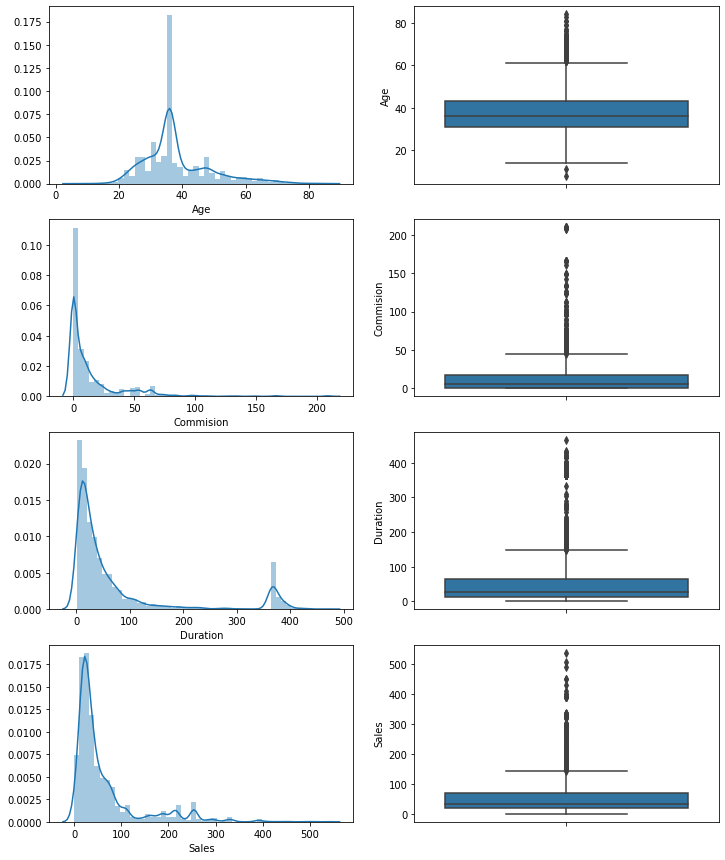

In [170]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12,15)

sns.distplot(dfi_1['Age'], ax=axes[0][0]) 
sns.boxplot(dfi_1['Age'], orient='v', ax=axes[0][1]) 

sns.distplot(dfi_1['Commision'], ax=axes[1][0])
sns.boxplot(dfi_1['Commision'], orient='v', ax=axes[1][1])

sns.distplot(dfi_1['Duration'], ax=axes[2][0])
sns.boxplot(dfi_1['Duration'], orient='v', ax=axes[2][1])

sns.distplot(dfi_1['Sales'], ax=axes[3][0])
sns.boxplot(dfi_1['Sales'], orient='v', ax=axes[3][1])

>**'Age' feature is quite a balanced data but few outliers are observed outside upper whisker while couple of outliers are on left whisker.**

>**'Commision' feature has bit right skewed data, also have presence of outliers on its upper whisker.**

>**'Duration' graph is a bimodel curve. It has seems to have more than couple of outliers on its upper whisker while one extraordinary datapoint (super outlier) is also shown in the graph which would require treatment.**

>**'Sales' data is right skewed and have sizable presence of outliers on its upper whisker.**

### Outlier treatment

In [171]:
def adjust_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

la,ua=adjust_outlier(dfi_1['Age'])
dfi_1['Age']=np.where(dfi_1['Age']>ua,ua,dfi_1['Age'])
dfi_1['Age']=np.where(dfi_1['Age']<la,la,dfi_1['Age'])

lc,uc=adjust_outlier(dfi_1['Commision'])
dfi_1['Commision']=np.where(dfi_1['Commision']>uc,uc,dfi_1['Commision'])
dfi_1['Commision']=np.where(dfi_1['Commision']<lc,lc,dfi_1['Commision'])

ld,ud=adjust_outlier(dfi_1['Duration'])
dfi_1['Duration']=np.where(dfi_1['Duration']>ud,ud,dfi_1['Duration'])
dfi_1['Duration']=np.where(dfi_1['Duration']<ld,ld,dfi_1['Duration'])

ls,us=adjust_outlier(dfi_1['Sales'])
dfi_1['Sales']=np.where(dfi_1['Sales']>us,us,dfi_1['Sales'])
dfi_1['Sales']=np.where(dfi_1['Sales']<ls,ls,dfi_1['Sales'])

C:\Users\gupta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gupta\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\gupta\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

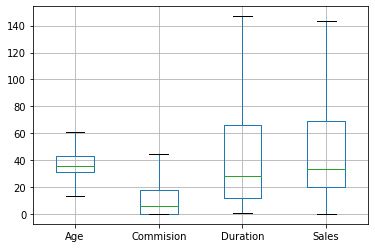

In [172]:
dfi_1.boxplot()
# republished boxplot.

**Treatment is given to the outliers, no outliers in dataset now.**

In [173]:
dfi_1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,2857,NaN,NaN,NaN,37.8939,9.82185,13,31,36,43,61
Agency_Code,2857,4,EPX,1238,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,2857,2,Travel Agency,1709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,2857,2,No,1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,2857,NaN,NaN,NaN,11.7554,15.4979,0,0,5.63,17.82,44.55
Channel,2857,2,Online,2811,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,2857,NaN,NaN,NaN,47.3542,47.2689,1,12,28,66,147
Sales,2857,NaN,NaN,NaN,51.1066,42.5867,0,20,33.5,69.3,143.25
Product Name,2857,5,Customised Plan,1069,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,2857,3,ASIA,2323,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### <u>Biveriate Analysis:<u>
**'HeatMap' helps in understanding if there is any strong correlation between any two numerical variables.**

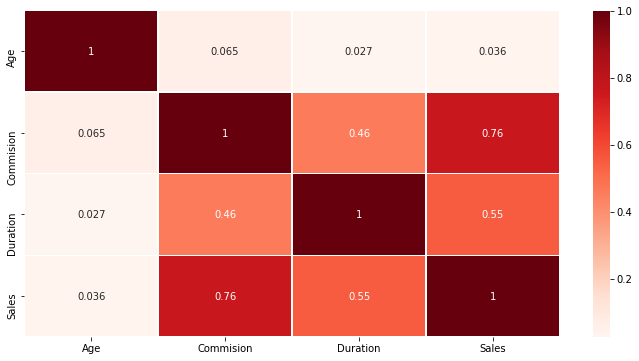

In [567]:
plt.figure(figsize=(12,6))
sns.heatmap(dfi_1.corr(), annot=True, linewidth=.5, cmap='Reds')

>**'Sales' and 'Commision' variables have reasonably high correlation.**

>**'Age' variable has very weak correlationship with other variables in dataset, be it 'Sales', 'Duration' or 'Commision'. It means, 'Age' is the least influencing factor here.**

# Data Split, Build CART Model, Random Forest and  Artificial Neural Network.

In [174]:
dfi_1
# Original dataset after dropping duplicate values. Columns are 'numerical' and 'non-numerical'.

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,C2B,Airlines,No,0.70,Online,7.0,2.51,Customised Plan,ASIA
1,36.0,EPX,Travel Agency,No,0.00,Online,34.0,20.00,Customised Plan,ASIA
2,39.0,CWT,Travel Agency,No,5.94,Online,3.0,9.90,Customised Plan,Americas
3,36.0,EPX,Travel Agency,No,0.00,Online,4.0,26.00,Cancellation Plan,ASIA
4,33.0,JZI,Airlines,No,6.30,Online,53.0,18.00,Bronze Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2995,28.0,CWT,Travel Agency,Yes,44.55,Online,147.0,143.25,Gold Plan,Americas
2996,35.0,C2B,Airlines,No,13.50,Online,5.0,54.00,Gold Plan,ASIA
2997,36.0,EPX,Travel Agency,No,0.00,Online,54.0,28.00,Customised Plan,ASIA
2998,34.0,C2B,Airlines,Yes,7.64,Online,39.0,30.55,Bronze Plan,ASIA


### Converting 'Non-Numerical' ('Object' data type) columns into 'Numeric' data type to make the data enable for further data analysis.

In [175]:
for column in dfi_1[['Agency_Code','Type','Claimed','Channel','Product Name', 'Destination']]:
    if dfi_1[column].dtype == 'object':
        dfi_1[column] = pd.Categorical(dfi_1[column]).codes 

C:\Users\gupta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [176]:
dfi_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2857 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2857 non-null   float64
 1   Agency_Code   2857 non-null   int8   
 2   Type          2857 non-null   int8   
 3   Claimed       2857 non-null   int8   
 4   Commision     2857 non-null   float64
 5   Channel       2857 non-null   int8   
 6   Duration      2857 non-null   float64
 7   Sales         2857 non-null   float64
 8   Product Name  2857 non-null   int8   
 9   Destination   2857 non-null   int8   
dtypes: float64(4), int8(6)
memory usage: 128.3 KB


**All columns of dataset 'dfi_1' is numerical now. dfi_1 is ready for modeling.**

In [177]:
dfi_1
# printing new dataset to see the values in column.

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0
...,...,...,...,...,...,...,...,...,...,...
2995,28.0,1,1,1,44.55,1,147.0,143.25,3,1
2996,35.0,0,0,0,13.50,1,5.0,54.00,3,0
2997,36.0,2,1,0,0.00,1,54.0,28.00,2,0
2998,34.0,0,0,1,7.64,1,39.0,30.55,0,0


In the above dataset, target variable 'Claimed' has '0's & '1's. \
**'0' = No (not claimed insurance) which is 68% or 1947 in numbers.**\
**'1' = Yes (claimed insurance) which is 32% or 914 in numbers.**

## Split dataset into Train and Test

In [178]:
X=dfi_1.drop('Claimed', axis=1)
y=dfi_1.pop('Claimed')

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)
# spliting data: "Train:Test = 70:30"

#### Checking dimensions of 'Training' and 'Test data'

In [180]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (1999, 9)
X_test (858, 9)
y_train (1999,)
y_test (858,)


**Training data has 2002 rows while Test data has 859 rows.\
Training data has 9 columns except target column whereas Test data has only one column 'Claimed' which is a target column.**

### Scaled the data for better performance of models

In [181]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
# using Standard Scaler.

In [182]:
X_train

array([[-0.20013219,  0.70357532,  0.82109948, ..., -0.48868234,
        -0.54646848, -0.44296627],
       [ 2.27258009,  1.69753085, -1.21787923, ..., -0.69873539,
        -1.3256343 , -0.44296627],
       [-0.20013219,  0.70357532,  0.82109948, ..., -0.34864697,
         0.23269735, -0.44296627],
       ...,
       [-0.20013219,  0.70357532,  0.82109948, ..., -0.90878845,
        -0.54646848, -0.44296627],
       [-0.20013219,  0.70357532,  0.82109948, ...,  1.40179514,
         0.23269735, -0.44296627],
       [-0.20013219,  0.70357532,  0.82109948, ...,  1.40179514,
         0.23269735,  1.2730988 ]])

**This is our scaled training data.**

In [183]:
X_test

array([[ 1.03622395, -0.2903802 ,  0.82109948, ..., -0.55870003,
        -1.3256343 , -0.44296627],
       [-0.20013219,  0.70357532,  0.82109948, ..., -0.34864697,
        -0.54646848, -0.44296627],
       [-0.20013219,  0.70357532,  0.82109948, ..., -1.21219842,
         0.23269735, -0.44296627],
       ...,
       [ 0.72713492, -1.28433573, -1.21787923, ...,  2.13114602,
         1.791029  , -0.44296627],
       [-0.71528058, -1.28433573, -1.21787923, ...,  2.13114602,
         1.791029  , -0.44296627],
       [-0.20013219, -1.28433573, -1.21787923, ..., -0.30196852,
         1.791029  , -0.44296627]])

**This is our scaled test data.**

### Building a CART Classifier

In [184]:
param_grid = {
    'criterion' : ['gini'],
    'max_depth': [3,4,5],
    'max_features': [4,5,6],
    'min_samples_leaf': [3,4,5], 
    'min_samples_split': [40,50,60]}

dtcl = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 5)

grid_search.fit(X_train, y_train)
grid_search.best_params_
best_grid_DT = grid_search.best_estimator_

best_grid_DT
    
# using hyper parameters built best grid for CART.

DecisionTreeClassifier(max_depth=4, max_features=5, min_samples_leaf=3,
                       min_samples_split=60, random_state=1)

In [39]:
DecisionTreeClassifier(max_depth=4, max_features=5, min_samples_leaf=4,
                       min_samples_split=50, random_state=1)

DecisionTreeClassifier(max_depth=4, max_features=5, min_samples_leaf=4,
                       min_samples_split=50, random_state=1)

**Above values are combination of Hyper parameters in order to optimize prediction performance of CART model.**

#### Predicting: Train & Test data- CART

In [185]:
y_train_predictDT = best_grid_DT.predict(X_train)
y_test_predictDT = best_grid_DT.predict(X_test)
# train and test prediction.

In [186]:
y_test_predictDT

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,

**Our prediction model is ready with '0's and '1's ('Not claimed insurance' and 'claimed insurance') for our target column "Claimed" on test data under CART model.**

In [187]:
y_train_predictDT

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

**Our prediction model is ready with '0's and '1's ('Not claimed insurance' and 'claimed insurance') for our target column "Claimed" on training data under CART model.**

### Classification Report for CART

In [189]:
print(classification_report(y_train, y_train_predictDT))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1356
           1       0.66      0.62      0.64       643

    accuracy                           0.78      1999
   macro avg       0.74      0.73      0.74      1999
weighted avg       0.77      0.78      0.77      1999



**Insurance claim cases denoted by '1's is more important for us.\
Important Values: Precision (0.70), recall (0.55), f1-score (0.61) and accuracy (0.78).**

Total number of customers on train data = 2002.\
'Not claimed insurance' are 1359, while 643 (or 32%) customers on trained data claimed their tour insurance.\

**We will read values on 'Classification Report' in % terms.\
Precision: 70%.\
Recall: 55%.\
f1-score: 61%.\
Accuracy: 78%.**

In [190]:
print(classification_report(y_test, y_test_predictDT))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       587
           1       0.64      0.61      0.63       271

    accuracy                           0.77       858
   macro avg       0.73      0.73      0.73       858
weighted avg       0.77      0.77      0.77       858



**Insurance claim cases denoted by '1's is more important for us.**\

Total number of customers on test data = 859.\
'Not claimed insurance' are 588, while 271 (or 31.5%) customers on test data claimed their tour insurance.\

**Important Values on test data.\
Precision: 68%.\
Recall: 52%.\
f1-score: 59%.\
Accuracy: 77%.**

**Precision and Recall values have slightly gone down in test case; however, overall train and test report values seem good and comparitively similer to each other.**

#### Let's check classification report on RF model and than compare that with CART report.

### Building a Random Forest Classifier

In [191]:
param_grid = {
    'criterion' : ['gini'],
    'max_depth': [6,7],
    'max_features': [5],
    'min_samples_leaf': [4],
    'min_samples_split': [60],
    'n_estimators' : [2000]}

rfcl = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

grid_search.fit(X_train, y_train)
grid_search.best_params_
best_grid_RF = grid_search.best_estimator_

best_grid_RF

RandomForestClassifier(max_depth=7, max_features=5, min_samples_leaf=4,
                       min_samples_split=60, n_estimators=2000, random_state=1)

RandomForestClassifier(max_depth=6, max_features=5, min_samples_leaf=4,
                       min_samples_split=60, n_estimators=2000, random_state=1)

**The given values are combination of Hyper parameters for RF model to get the best prediction performance on train and test data.**

#### Predicting: Train & Test data- RF

In [192]:
y_train_predictRF = best_grid_RF.predict(X_train)
y_test_predictRF = best_grid_RF.predict(X_test)

In [193]:
y_test_predictRF

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

**'1's denote 'claimed insurance' cases.**

In [194]:
y_train_predictRF

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

**The dataset is array, just a few entries are printed here however the entire train data has 2002 entries which are '0's and '1's.**

### Classification Report for Random Forest

In [195]:
print(classification_report(y_train, y_train_predictRF))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1356
           1       0.73      0.62      0.67       643

    accuracy                           0.80      1999
   macro avg       0.78      0.75      0.76      1999
weighted avg       0.80      0.80      0.80      1999



**Value of '1's on training data (in %).\
Precision: 74%.\
Recall: 61%.\
f1-score: 67%.\
Accuracy: 81%.**

Total number of customers on train data = 2002.\
'Not claimed insurance' are 1359, while 643 (or 32%) customers on trained data claimed their tour insurance.\

**RF classification report on training data is out-performing CART report (training) on every parameter.** 

In [196]:
print(classification_report(y_test, y_test_predictRF))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       587
           1       0.69      0.58      0.63       271

    accuracy                           0.78       858
   macro avg       0.75      0.73      0.74       858
weighted avg       0.78      0.78      0.78       858



**Value of '1's on test data (in %).\
Precision: 70%.\
Recall: 58%.\
f1-score: 64%.\
Accuracy: 79%.**

Total number of customers on test data = 859.\
'Not claimed insurance' are 588, while 271 (or 31.5%) customers on test data claimed their tour insurance.\

**RF classification report (test data) performs better than CART report on test data.\
All the values have shown improvement in RF report comparing CART. However, the major change is in 'Recall' value from 52% to 58% in RF report.**

**So far, when comparing between CART and RF classification models, RF seems performing better. However, We should once take a look at Neural Network classification model also and compare its performance with Random Forest classification model.**

### Building a Neural Network Classifier

In [197]:
param_grid = {
    'hidden_layer_sizes': [100],
    'max_iter': [500],
    'solver': ['sgd','adam'],
    'tol': [0.01]}

nncl = MLPClassifier(random_state=1)
grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 5)

grid_search.fit(X_train, y_train)
grid_search.best_params_
best_grid_ANN = grid_search.best_estimator_

best_grid_ANN

MLPClassifier(hidden_layer_sizes=100, max_iter=500, random_state=1, tol=0.01)

MLPClassifier(hidden_layer_sizes=100, max_iter=500, random_state=1, tol=0.01)

**The given hyper parameters are the optimized values for ANN classification model which will help in getting the best prediction performance on train and test data.**

#### Predicting: Train & Test data- ANN

In [198]:
y_train_predictANN = best_grid_ANN.predict(X_train)
y_test_predictANN = best_grid_ANN.predict(X_test)

In [199]:
y_test_predictANN

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

**'1's denote 'claimed insurance' cases.**

In [200]:
y_train_predictANN

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

**The dataset is array, just a few entries are printed here however the entire train data has 2002 entries which are '0's and '1's.**

### Classification Report for ANN

In [201]:
print(classification_report(y_train, y_train_predictANN))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1356
           1       0.69      0.52      0.59       643

    accuracy                           0.77      1999
   macro avg       0.74      0.70      0.72      1999
weighted avg       0.76      0.77      0.76      1999



**Value of '1's on training data (in %).\
Precision: 64%.\
Recall: 56%.\
f1-score: 60%.\
Accuracy: 76%.**

Total number of customers on train data = 2002, with '0's (no claim) = 1359 and '1's (claim) = 643 (or 32%)./

**ANN classification model on training data is not any better than the previous two classification models (CART & RF).\
ANN's precision score is the least, 64%, among all 3 models.\
Recall score with 56% is lower than RF recall score but at par with CART.\
While, ANN Accuracy score with 76% is the least comparing RF and CART classification models.** 

In [202]:
print(classification_report(y_test, y_test_predictANN))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       587
           1       0.69      0.49      0.57       271

    accuracy                           0.77       858
   macro avg       0.74      0.69      0.71       858
weighted avg       0.76      0.77      0.76       858



**Value of '1's on test data (in %).\
Precision: 66%.\
Recall: 55%.\
f1-score: 60%.\
Accuracy: 77%.**


**The performance of ANN classification model on test data is at par with CART, however it lags behind when comparing with RF classification model.**

**ANN test data recall score outperforms CART, with a difference of 55% to 52%; but precision score is lower with 66% in comparision to 68% for CART. However, Accuracy score ties between ANN and CART.** 

# Publish Performance Metrics

#### Accuracy on CART Model

In [203]:
print('Accuracy Score on training dataset in CART model: ', accuracy_score(y_train, y_train_predictDT).round(2))
print('Accuracy Score on test dataset in CART model: ', accuracy_score(y_test, y_test_predictDT).round(2))

Accuracy Score on training dataset in CART model:  0.78
Accuracy Score on test dataset in CART model:  0.77


#### Accuracy on Random Forest Model

In [204]:
print('Accuracy Score on training dataset in RF model: ',accuracy_score(y_train, y_train_predictRF).round(2))
print('Accuracy Score on test dataset in RF model: ',accuracy_score(y_test, y_test_predictRF).round(2))

Accuracy Score on training dataset in RF model:  0.8
Accuracy Score on test dataset in RF model:  0.78


#### Accuracy on Artificial Neural Networks Model

In [205]:
print('Accuracy Score on training dataset in ANN model: ', accuracy_score(y_train, y_train_predictANN).round(2))
print('Accuracy Score on test dataset in ANN model: ', accuracy_score(y_test, y_test_predictANN).round(2))

Accuracy Score on training dataset in ANN model:  0.77
Accuracy Score on test dataset in ANN model:  0.77


**From predictive accuracy point of view, generally considered, higher the score is, better it's prediction performance will be. From this reasoning, RF has the best accuracy score (81% & 79%) on two set to data. It means, RF model got 81% & 79% predictions correct, respectively on train and test data.**

### Confusion Matrix on CART model

In [206]:
confusion_matrix(y_train, y_train_predictDT)

array([[1151,  205],
       [ 244,  399]], dtype=int64)

**Confusion Matrix is a 2*2 tabular structure useful in predictive analytics like: accuracy, recall, specificity, precision and error rate.\
Matrix carries values like: True Positives (TP), False Positives(FP), True Negatives (TN) and False Negatives (FN).**

**In the above confusion matrix-\
TP = 1207\
FP = 291\
TN = 352\
FN = 152\
Total observations = 2002 (size of training data on CART model).**

**Looking at the problem statement in hand, company wants to correctly predict customers who are likely to use 'insurance claim'. 'Specificity' will help us here in predicting about those customers so that company can manouver features or price or may be both in their insurance policy specifically for those customers.

**> Specificity = TN/(TN+FP) = 55% (in above confusion matrix).\
Accuracy = (TP+TN) / (TP+TN+FP+FN) = 78%.\
Error Rate = 1- Accuracy = 22%.\
Type 1 error = 'False Positive' cases (291); it means, in these many number of observations model could not anticipate correctly that they are 'actual claim' cases. They are quite serious in nature in this case.**

**The performance of prediction model, as per confusion matrix, does good in "accuracy" while its predictability on "specificity" is bit low.**

In [207]:
confusion_matrix(y_test, y_test_predictDT)

array([[495,  92],
       [105, 166]], dtype=int64)

**In this confusion matrix-\
TP = 521\
FP = 129\
TN = 142\
FN = 67\
Total observations = 859 (size of test data on CART model).**

**> Specificity = TN/(TN+FP) = 52% (also called as True Negative Rate).\
Accuracy = (TP+TN) / (TP+TN+FP+FN) = 77%.\
Error Rate = 1- Accuracy = 23%.\
Type 1 error = FP = 129.**

**Specificity and Accuracy is somewhat same in % value as training sample on CART model.**

### Confusion Matrix on Random Forest model

In [208]:
confusion_matrix(y_train, y_train_predictRF)

array([[1206,  150],
       [ 247,  396]], dtype=int64)

**Values on confusion matrix for Training data on RF model-\
TP = 1221\
FP = 249\
TN = 394\
FN = 138\
Size of training data on RF model = 2002.**

**> Specificity = TN/(TN+FP) = 61%.\
Accuracy = (TP+TN) / (TP+TN+FP+FN) = 81%.\
Error Rate = 1- Accuracy = 19%.\
Type 1 error = FP = 249.**

**This confusion matrix predicts better results than confusion matrix for CART model on training data. Also, lower in type 1 error.**

In [209]:
confusion_matrix(y_test, y_test_predictRF)

array([[515,  72],
       [114, 157]], dtype=int64)

**confusion matrix values for test data on RF model-\
TP = 519\
FP = 113\
TN = 158\
FN = 69\
Size of test data on RF model = 859.**

**> Specificity = TN/(TN+FP) = 58%.\
Accuracy = (TP+TN) / (TP+TN+FP+FN) = 79%.\
Error Rate = 1- Accuracy = 21%.\
Type 1 error = FP = 113.**

**This confusion matrix predicts better results than confusion matrix for CART model on test sample. Also, type 1 error is lower.**

### Confusion Matrix on Artificial Neural Networks model

In [210]:
confusion_matrix(y_train, y_train_predictANN)

array([[1203,  153],
       [ 308,  335]], dtype=int64)

**Values on confusion matrix for Training data on ANN model-\
TP = 1159\
FP = 285\
TN = 358\
FN = 200\
Size of training data on ANN model = 2002.**

**> Specificity = TN/(TN+FP) = 56%.\
Accuracy = (TP+TN) / (TP+TN+FP+FN) = 76%.\
Error Rate = 1- Accuracy = 24%.\
Type 1 error = FP = 285.**

**Prediction performance of Confusion matrix for ANN model training sample is not better than the same matrix for Random Forest (RF model) on training data.\
However, it's performace is at par with CART model on training data.**

In [211]:
confusion_matrix(y_test, y_test_predictANN)

array([[529,  58],
       [139, 132]], dtype=int64)

**Values on confusion matrix for test data on ANN model-\
TP = 511\
FP = 122\
TN = 149\
FN = 77\
Size of test data on ANN model = 859.**

**> Specificity = TN/(TN+FP) = 55%.\
Accuracy = (TP+TN) / (TP+TN+FP+FN) = 77%.\
Error Rate = 1- Accuracy = 23%.\
Type 1 error = FP = 122.**

**Prediction performance of Confusion matrix for ANN model on test sample is little better than the same matrix for CART. Specially, 'specificity' is high and 'type 1 error' is bit lower on ANN model. However, it is out performed by RF model confusion matrix on all major performance values.**

#### Before going for graphical presentation of performance model, We need to get the predicted probabilities of Train and Test data for all 3 models: DT, RF & ANN.

### Predicted Probabilities with CART Model

In [212]:
probs_trainDT=best_grid_DT.predict_proba(X_train)
probs_testDT=best_grid_DT.predict_proba(X_test)

print(probs_trainDT.shape)
print()
print(probs_trainDT)

(1999, 2)

[[0.91349481 0.08650519]
 [0.91349481 0.08650519]
 [0.81924883 0.18075117]
 ...
 [0.91349481 0.08650519]
 [0.59633028 0.40366972]
 [0.59633028 0.40366972]]


**2002 rows & 2 columns. \
The array is a training data on CART model wherein value of each data point is converted into predicted probability.\
1st columns represents, probability to happen while 2nd column is for probability not to happen for the same data point.\ 
Sum of these 2 columns are always 1.0. Example: 0.77083333 + 0.22916667 = 1.0).**

In [213]:
print(probs_testDT.shape)
print()
print(probs_testDT)

(858, 2)

[[0.63636364 0.36363636]
 [0.91349481 0.08650519]
 [0.81924883 0.18075117]
 ...
 [0.22265625 0.77734375]
 [0.22265625 0.77734375]
 [0.44642857 0.55357143]]


**859 rows, 2 columns. \
Predicted probabilities of each data point is printed in 2 columns, col0 and col1, with probability of likely and unlikelyhood.**

### Predicted Probabilities with Random Forest Model

In [214]:
probs_trainRF=best_grid_RF.predict_proba(X_train)
probs_testRF=best_grid_RF.predict_proba(X_test)

print(probs_trainRF.shape)
print()
print(probs_trainRF)

(1999, 2)

[[0.92873727 0.07126273]
 [0.89911295 0.10088705]
 [0.81061534 0.18938466]
 ...
 [0.93969156 0.06030844]
 [0.72735128 0.27264872]
 [0.64744242 0.35255758]]


**Training data on RF model, converted into predicted probability.**

In [215]:
print(probs_testRF.shape)
print()
print(probs_testRF)

(858, 2)

[[0.69925481 0.30074519]
 [0.89706468 0.10293532]
 [0.91114768 0.08885232]
 ...
 [0.15913176 0.84086824]
 [0.22765028 0.77234972]
 [0.43972635 0.56027365]]


**Test data on RF model, value of each data point is converted into predicted probability.**

### Predicted Probabilities with Neural Networks Model

In [216]:
probs_trainANN=best_grid_ANN.predict_proba(X_train)
probs_testANN=best_grid_ANN.predict_proba(X_test)

print(probs_trainANN.shape)
print()
print(probs_testANN)

(1999, 2)

[[0.82440241 0.17559759]
 [0.87805385 0.12194615]
 [0.90631258 0.09368742]
 ...
 [0.21226405 0.78773595]
 [0.19450603 0.80549397]
 [0.42362495 0.57637505]]


**Training data on ANN model, value of each data point is converted into predicted probability.**

In [217]:
print(probs_testANN.shape)
print()
print(probs_testANN)

(858, 2)

[[0.82440241 0.17559759]
 [0.87805385 0.12194615]
 [0.90631258 0.09368742]
 ...
 [0.21226405 0.78773595]
 [0.19450603 0.80549397]
 [0.42362495 0.57637505]]


**Test data on ANN model, value of each data point is converted into predicted probability.**

### ROC Curve & ROC_AUC Score: Decision Tree

AUC under Training data in CART Model: 0.805


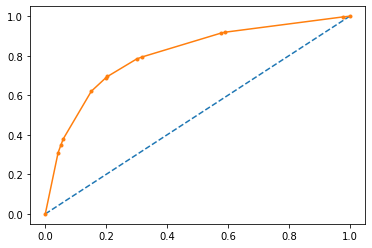

In [218]:
# keep probabilities for the positive outcome only
probs = probs_trainDT[ : , 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC under Training data in CART Model: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs, pos_label = 1)

plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [151]:
y_train.value_counts()

0    1356
1     643
Name: Claimed, dtype: int64

In [152]:
y_test.value_counts()

0    587
1    271
Name: Claimed, dtype: int64

AUC under Test data in CART Model: 0.785


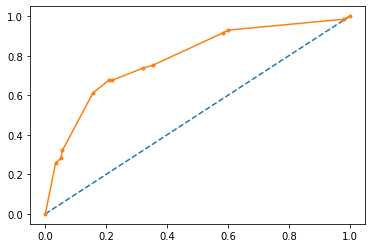

In [219]:
# keep probabilities for the positive outcome only
probs = probs_testDT[ : , 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC under Test data in CART Model: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label = 1)

plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### ROC Curve & ROC_AUC Score: Random Forest

AUC under Training data in RF Model: 0.854


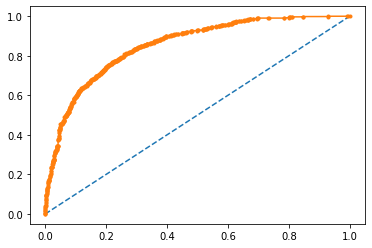

In [220]:
# keep probabilities for the positive outcome only
probs = probs_trainRF[ : , 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC under Training data in RF Model: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs, pos_label = 1)

plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC under Test data in RF Model: 0.819


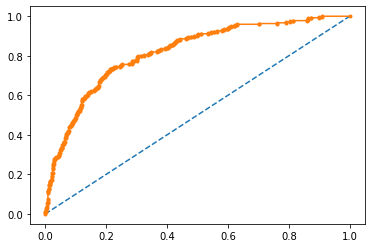

In [221]:
# keep probabilities for the positive outcome only
probs = probs_testRF[ : , 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC under Test data in RF Model: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label = 1)

plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### ROC Curve & ROC_AUC Score: Artificial Neural Networks

AUC under Training data in Neural Networks Model: 0.800


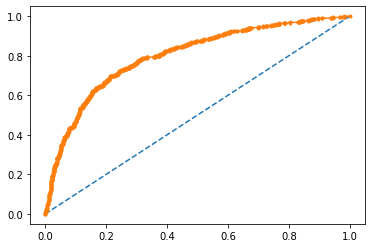

In [222]:
# keep probabilities for the positive outcome only
probs = probs_trainANN[ : , 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC under Training data in Neural Networks Model: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs, pos_label = 1)

plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC under Test data in Neural Networks Model: 0.807


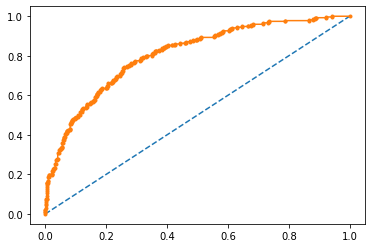

In [223]:
# keep probabilities for the positive outcome only
probs = probs_testANN[ : , 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC under Test data in Neural Networks Model: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label = 1)

plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### CART Model

**Specificity (train & test data) = 55% & 52%.\
Accuracy (train & test data) = 78% & 77%.\
Error Rate (train & test data) = 1- Accuracy = 22% & 23%.\
Type 1 error (train & test data) = 291 & 129.

>**'Specificity' just above 50% seems low which basically reveals that model is unable to predict correctly on 'actual claim' cases.**

>**'Accuracy' of the model is good but it has 22% 'Error Rate' also. A model with this accuracy level can be considered for the problem we have in hand.
With the decline in 'type 1 error' value in both, training & test samples, the model performance will improve a lot.**

**AUC score (train & test data) = 0.81 & 0.79, is very good.**

### RF Model

**> Specificity (train & test data) = 61% & 58%.\
Accuracy (train & test data) = 81% & 79%.\
Error Rate (train & test data) = 1- Accuracy = 19% & 21%.\
Type 1 error (train & test data) = 249 & 113.**


> **'Specificity' score seems good (considering the problem type). Our model seems fairly strong to detect possible 'claim cases' in advance.
**>'Accuracy' rate seems high which is a good news.
'type 1 error' has gone down in RF model, this helps in detecting the actual claim cases better. Therefore, Specificity and Accuracy score is better which in turn is reflecting on overall RF as a better prediction model.**

**AUC score (train & test data) = 0.857 & 0.818, is an excellect score.**

### ANN Model

**> Specificity (train & test data) = 56% & 55%.\
Accuracy (train & test data) = 76% & 77%.\
Error Rate (train & test data) = 24% & 23%.\
Type 1 error (train & test data) = 285 & 122.**

> **'Specificity' score seems almost inline with CART model. Basically, this is an average score.**\
**>'Accuracy' rate seems good.\
'type 1 error' is only marginally lower than CART model but type 2 error in this case has gone up which is the highest among all three models. This indicate an increment in False Negative cases which is an error of predicting as a possible claim by the customer but in actual there is no claim.**

**AUC score (train & test data) = 0.792 & 0.798, is a very good score.**

> **After studying all three model in light of their performace on prediction parameter, I can say with confidence that RF Model out performs in this case as it scores highest on all major performance value parameters.**

## The Best Model

> **Highest precision score of RF model indicates, this model performed the best in predicting positive values/ unclaimed insurances.\
> Highest recall score of RF model indicates highest true positive rate.\
> F1 score is best in RF model which is an indication of high precision and high recall values.\
> AUC score above 0.80 is considered excellent, in a general case; here it is ~0.86 on RF model. Means, prediction of this model is ~86% correct. \
> On Specificity, RF model scores the highest which is nothing but the true negative rate. \
Highest accuracy in RF model indicates that this model got most of its predictions right. \
> Since Error Rate is just opposite to the Accuracy, therefore it has to be the lowest in RF model.\
> Last but not the least, Type 1 error is the least in RF model, indicates that on the least number of occasions RF model failed to predict an actual claim.**

**Therefore, RF model is the best prediction model in the present case.**

# Business insights and recommendations.


#### Business Insight
**The dataset has observations about 2861 customers who bought tour insurance plan, out of which 32% (914) customers claimed their insurance. 1 out of every 3 customers are filing insurance claim which is exorbitantly high.** \

If company rejects most of the claim requests, it will reflect in 'claim setlement ratio' which is a critical and one of the most sellable feature in insurance industry in new business acquisition. Low 'claim setlement ratio' may encourage customers buying insurance from competition. Therefore, company has to maintain a thin line balance between awarding a claim request and rejecting it. \

But if claim requests are just too many in numbers, as it is in this case (32%), the challange to  management team gets tougher. 

To solve this problem, we built three prediction models and found Random Forest (RF) model performs the best in this situation.

#### Recommendations:
> 1. Using RF model probability prediction for each customer, I would recommend management to tweak insurance premium charges which means, for customers with high probability to put up the claim, charge the higher premium. For other customers, the usual premium rates will continue.

This will help management in avoiding high risk customers (who have high probability for claim), as they may turn away to other insurance sellers because of high premium rates. If some of high risk customers still come on board, they will come with a premium amount.

> 2. Management can roll out a flexi offer, specially for high risk customers where they can choose to pay for each selected insurance service/ coverage.
This will be a win-win for customers and company. Higher premuim, higher coverage for customers while for company it is higher ticket price with higher risk of claim. 

> 3. Based on the prediction model, management can design customer retention program for those who have low probability of claim.